In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Load dataset (we will use the "Boston Housing" dataset from sklearn)
from sklearn.datasets import fetch_openml

In [29]:
# Load the dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.data
df['PRICE'] = boston.target

In [30]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


CRIM - Per Capita Crime Rate \\
ZN - Proportion of Residential Land Zoned for Large Lots (over 25,000 sq. ft.) \\
INDUS - Proportion of Non-Retail Business Acres Per Town \\
CHAS - Charles River Dummy Variable (1 = tract bounds the river; 0 = otherwise) \\
NOX - Nitric Oxides Concentration (parts per 10 million) \\
RM - Average Number of Rooms Per Dwelling \\
AGE - Proportion of Owner-Occupied Units Built Before 1940 \\
DIS - Weighted Distances to Five Boston Employment Centers \\
RAD - Index of Accessibility to Radial Highways \\
TAX - Full-Value Property Tax Rate per \$10,000 \\
PTRATIO - Pupil-Teacher Ratio by Town \\
B - Proportion of Black Population (1000 × (Bk - 0.63)², where Bk is the proportion of Black residents) \\
LSTAT - Percentage of Lower-Status Population \\
MEDV - Median Value of Owner-Occupied Homes (in $1000s) \\

In [31]:
# Split the data into training and testing sets
X_simple = df[['RM']]  # Simple regression with 'RM' (average number of rooms per dwelling) as a predictor
y = df['PRICE']
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)


# **df[['RM']] Returns a DataFrame (2D structure).**

Use this when you need a 2D structure, such as for models like LinearRegression, which expect a 2D array as input which ensures compatibility with scikit-learn's fit() method.

# **df['RM'] Returns a Series (1D structure).**

Use this when you want to work with a 1D structure (e.g., plotting, calculations, or directly indexing a column).Not suitable for scikit-learn's fit() method when a 2D structure is required.

In [32]:
df['RM'].shape

(506,)

In [33]:
df['RM'].ndim

1

In [34]:
df[['RM']].shape

(506, 1)

In [35]:
df[['RM']].ndim

2

In [36]:
df.shape

(506, 14)

In [37]:
df.ndim

2

In [38]:
df['RM']

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [39]:
df[['RM']]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [40]:
X_train_simple

,RM
477,5.304
15,5.834
332,6.031
423,6.103
19,5.727
...,...
106,5.836
270,5.856
348,6.635
435,6.629


In [41]:
y_train

,PRICE
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [42]:
X_test_simple

,RM
173,6.416
274,6.758
491,5.983
72,6.065
452,6.297
...,...
412,4.628
436,6.461
411,6.657
86,6.015


In [43]:
y_test

,PRICE
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [44]:
# Simple Linear Regression
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

LinearRegression()

In [45]:
# Predictions for simple regression
y_pred_simple = simple_model.predict(X_test_simple)

In [46]:
# Evaluate the models
print("Simple Linear Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_simple):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_simple):.2f}")

Simple Linear Regression Metrics:
Mean Squared Error: 46.14
R^2 Score: 0.37


MSE represents the average squared difference between actual and predicted values. A higher MSE typically indicates that the predictions are far from the actual values. In this case, since the target variable MEDV (median value of homes) usually ranges between 5 and 50 (in thousands), an MSE of 46.14 might suggest significant error in prediction. \\
The R² score of 0.37 means that the model explains 37% of the variance in the data, which is relatively low for this dataset. Usually, a well-trained linear regression model on this dataset should have an R² score above 0.6. A score of 0.37 suggests that the linear model isn't capturing enough of the relationships in the data.

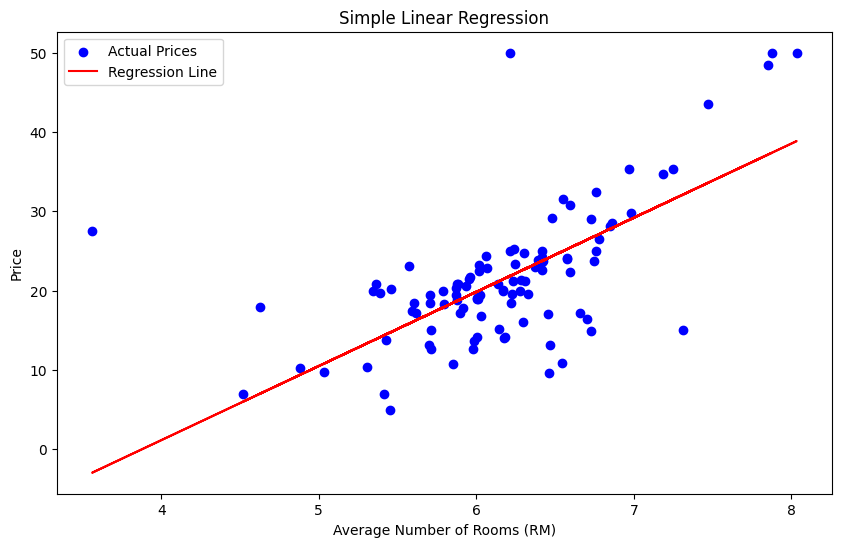

In [47]:
# Plotting the regression line (Simple Linear Regression)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color="blue", label="Actual Prices")
plt.plot(X_test_simple, y_pred_simple, color="red", label="Regression Line")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

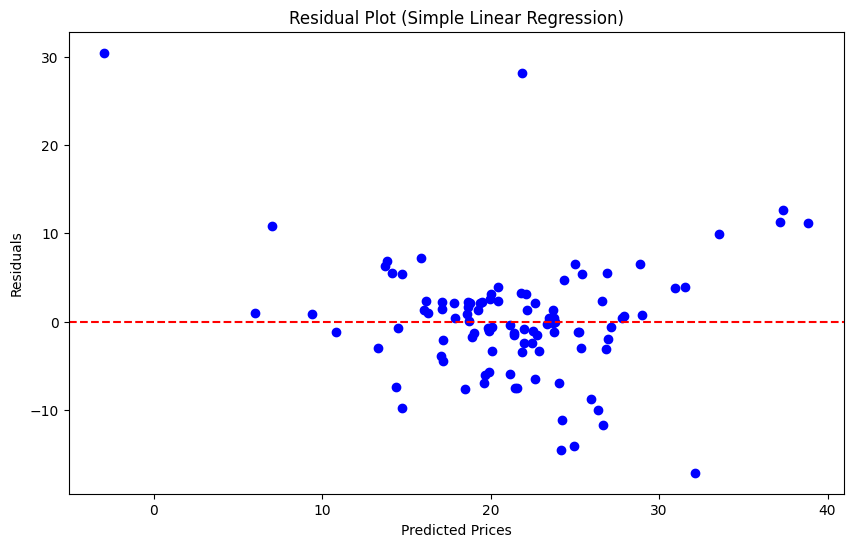

In [48]:
# Residual plot for Simple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_simple, y_test - y_pred_simple, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Simple Linear Regression)")
plt.show()

In [49]:
# Multiple Linear Regression with several variables
X_multi = df[['RM', 'LSTAT', 'PTRATIO']]  # Using more predictors
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [50]:
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train)

LinearRegression()

In [51]:
# Predictions for multiple regression
y_pred_multi = multi_model.predict(X_test_multi)


In [52]:
X_test_multi

,RM,LSTAT,PTRATIO
173,6.416,9.04,16.6
274,6.758,3.53,17.6
491,5.983,18.07,20.1
72,6.065,5.52,19.2
452,6.297,17.27,20.2
...,...,...,...
412,4.628,34.37,20.2
436,6.461,18.05,20.2
411,6.657,21.22,20.2
86,6.015,12.86,18.5


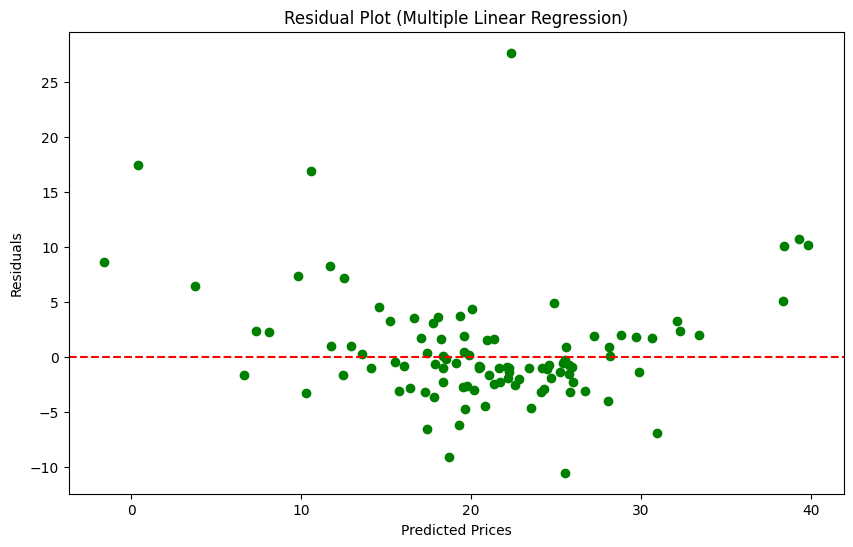

In [53]:
# Residual plot for Multiple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi, y_test - y_pred_multi, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Multiple Linear Regression)")
plt.show()

In [54]:
print("\nMultiple Linear Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_multi):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_multi):.2f}")



Multiple Linear Regression Metrics:
Mean Squared Error: 27.11
R^2 Score: 0.63


A lower MSE indicates better performance. In this case, an MSE of 27.11 is lower than the MSE of 46.14 from the simple linear regression you previously had, which suggests an improvement in prediction accuracy with the multiple linear regression model.
An MSE of 27.11 means that, on average, the squared difference between predicted and actual house prices is 27.11. Since the target (MEDV) ranges from 5 to 50 (in thousands), this is a relatively reasonable error, but there might still be room for improvement.

An R² score of 0.63 means that 63% of the variance in house prices is explained by the model. This is a relatively good result for a Multiple Linear Regression model on this dataset, as it indicates that the model is able to capture a significant portion of the relationship between the features and the target variable.
However, the remaining 37% of the variance is not explained, suggesting there are other factors influencing the house prices that are not accounted for by the model. This could indicate the presence of non-linear relationships, interaction terms, or important features that have been missed.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
from sklearn.datasets import load_diabetes

In [57]:
dataset=load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [58]:
diabetes = load_diabetes(as_frame=True)
df = diabetes.data  # Feature data
df['target'] = diabetes.target  # Target data


# data = load_diabetes() # returns dense array
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

In [59]:
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  target  
 0   -0.0

In [60]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


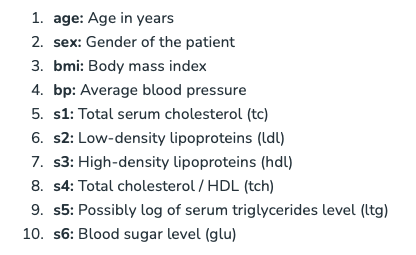

In [61]:
df['target']

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [62]:
X = df[['bmi']]  # Selecting a single feature for simple linear regression
y = df['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **df[['bmi']] Returns a DataFrame (2D structure).**

Use this when you need a 2D structure, such as for models like LinearRegression, which expect a 2D array as input which ensures compatibility with scikit-learn's fit() method.

# **df['bmi'] Returns a Series (1D structure).**

Use this when you want to work with a 1D structure (e.g., plotting, calculations, or directly indexing a column).Not suitable for scikit-learn's fit() method when a 2D structure is required.

In [64]:
df[['bmi']].shape

(442, 1)

In [65]:
df[['bmi']].ndim

2

In [66]:
df['bmi'].shape

(442,)

In [67]:
df['bmi'].ndim

1

In [68]:
df.shape

(442, 11)

In [69]:
df.ndim

2

In [70]:
df[['bmi']]

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [71]:
df['bmi']

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [72]:
X_train

,bmi
17,0.012117
66,-0.018062
137,0.049840
245,-0.035307
31,-0.065486
...,...
106,-0.076264
270,0.030440
348,-0.020218
435,-0.023451


In [73]:
y_train

,target
17,144.0
66,150.0
137,280.0
245,125.0
31,59.0
...,...
106,134.0
270,202.0
348,148.0
435,64.0


In [74]:
X_test

,bmi
287,-0.006206
211,0.036907
72,-0.004050
321,0.051996
73,-0.020218
...,...
255,-0.065486
90,-0.025607
57,-0.063330
391,-0.069797


In [75]:
y_test

,target
287,219.0
211,70.0
72,202.0
321,230.0
73,111.0
...,...
255,153.0
90,98.0
57,37.0
391,63.0


In [76]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred_simple = simple_model.predict(X_test)

In [78]:
predict_one= simple_model.predict([[0.0435279]])
#for single prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [79]:
predict_one

array([195.46934401])

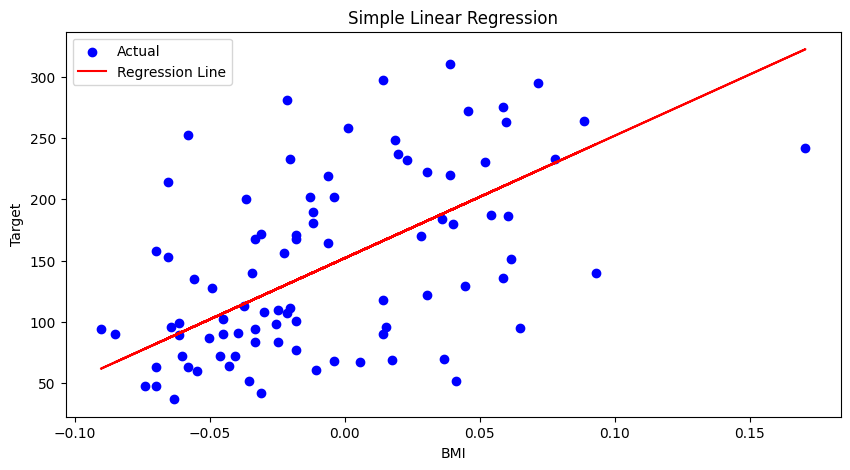

In [80]:
# Visualize the simple linear regression line
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

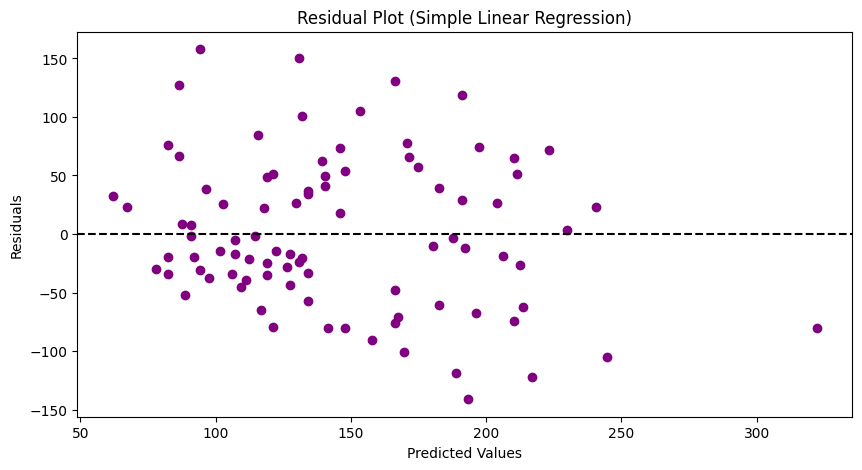

In [81]:
# Residual plot for simple regression
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_simple, y_test - y_pred_simple, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Simple Linear Regression)')
plt.show()

In [82]:
X_multi = df.drop(columns=['target'])

In [83]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [84]:
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

LinearRegression()

In [85]:
y_pred_multi = multi_model.predict(X_test_multi)

In [88]:
predict_multi= multi_model.predict([[0.0435279,-0.0435279, 0.0435279, 0.0435279,-0.0435279,0.0435279,-0.1212279,0.01212279,0.0112279,-0.0435279]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [89]:
predict_multi

array([255.04320219])

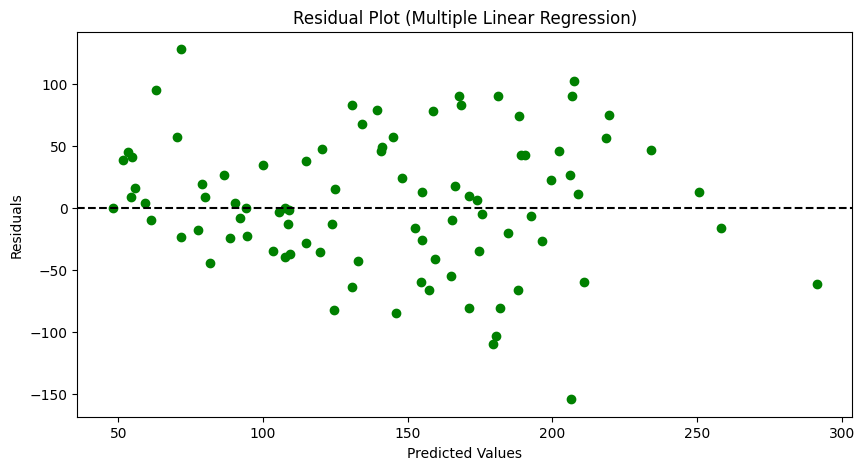

In [86]:
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_multi, y_test_multi - y_pred_multi, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Multiple Linear Regression)')
plt.show()

In [87]:
# Print metrics for both models
print("Simple Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_simple):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_simple):.2f}\n")

print("Multiple Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi):.2f}")
print(f"R-squared: {r2_score(y_test_multi, y_pred_multi):.2f}")


Simple Linear Regression:
Mean Squared Error: 4061.83
R-squared: 0.23

Multiple Linear Regression:
Mean Squared Error: 2900.19
R-squared: 0.45


# **Linear Regression:**

A relatively high MSE indicates that the model is not capturing the underlying patterns in the data very well. This could be due to the model's simplicity, as it only considers a single feature to predict the target.

An R-squared value of 0.23 suggests that the model explains only 23% of the variance in the target variable. This is quite low and further indicates that a simple linear regression with just one feature does not provide a good fit to the data.

# **Multiple Linear Regression:**

The MSE is lower than that of the simple linear regression model, showing an improvement in the model's prediction performance when multiple features are used. However, the value is still somewhat high, indicating that there's still room for improvement in the model's accuracy.

An R-squared value of 0.45 suggests that the multiple linear regression model explains 45% of the variance in the target variable. While still not a perfect fit, this is a significant improvement over the simple linear regression model. The use of multiple features allows for a more nuanced understanding of the relationship between input variables and the target, but the model is still far from capturing all the complexities in the data.


The Multiple Linear Regression model performs better than the Linear Regression model in both terms of MSE and R-squared, indicating that using multiple features allows the model to make more accurate predictions.

The R-squared values of both models are relatively low, especially in the context of the diabetes dataset, where a good model typically explains more variance. This suggests that either the models aren't complex enough to capture the relationships in the data, or there may be additional factors that the models aren't taking into account (such as non-linear relationships or interactions between features).

# **To further improve the model:**

**Feature Engineering:** Adding or transforming features, or using non-linear models, might capture more complex patterns.

**Regularization:** Techniques like Ridge or Lasso regression might help prevent overfitting or underfitting by penalizing overly complex models.

**Advanced Models:** Exploring models like Decision Trees, Random Forests, or Gradient Boosting might lead to better performance for this dataset.